In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set();

In [2]:
ls ../data

Reviews.csv


In [14]:
data = '../data/Reviews.csv'
data = pd.read_csv(data)

In [15]:
print(data.shape)

(568454, 10)


In [16]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
ls ../data

Reviews.csv


In [18]:
data.iloc[0]["Score"]

5

In [19]:
df_reduced = data.sample(frac=0.1, random_state=7)
print(df_reduced.shape)

(56845, 10)


In [20]:
labels = np.array([df_reduced['Score'] >= 4])[0][:].astype(int) # if the score > 4, then 1 else 0
texts  =  df_reduced['Text'].values
print("The number of labels: ", len(labels))
print("The number of texts: ", len(texts))

The number of labels:  56845
The number of texts:  56845


In [21]:
print(labels[:3])
print(texts[:2])

[1 1 0]
[ 'We always brew Starbucks coffee at home and we rarely consume flavored coffee. We tried this coffee and liked it.<br /><br />If you enjoy flavored coffee, then you are likely to enjoy this coffee.<br /><br />I wish it brewed a little stronger (bold) coffee.'
 'Tasty and fresh - Just like Grandma used to make.  Better than the frozen kind.  In a rich marinara sauce, who can resist?  Service was very good.']


In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 500 # cut reviews after 500 words
max_words = 10000 # consider only 10000 most common words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique tokens. ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor: ", data.shape)
print("Shape of label tensor: ", labels.shape)

Found 47815 unique tokens. 
Shape of data tensor:  (56845, 500)
Shape of label tensor:  (56845,)


In [23]:
training_samples = int(len(labels) * .9) + 1 # train on 90% of data examples
test_samples = int(int(len(labels) * .1) / 2)  #  test on 10% of data samples

print("training samples", training_samples)
print("test samples: ", test_samples)
print("Sanity check: ", (training_samples + test_samples * 2) == len(labels))
print(len(labels) , (training_samples + test_samples * 2) )

training samples 51161
test samples:  2842
Sanity check:  True
56845 56845


In [24]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_test = data[training_samples:training_samples   + test_samples]
y_test = labels[training_samples:training_samples + test_samples]
print(X_train.shape)
print(X_test.shape)

(51161, 500)
(2842, 500)


In [25]:
from keras.layers import Dense, Embedding, SimpleRNN, RNN, LSTM, Bidirectional
from keras import  regularizers
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(Embedding(max_words, 32))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.2, dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 40928 samples, validate on 10233 samples
Epoch 1/20
40928/40928 [==============================] - 487s 12ms/step - loss: 0.4127 - acc: 0.8181 - val_loss: 0.3308 - val_acc: 0.8602
Epoch 2/20
40928/40928 [==============================] - 476s 12ms/step - loss: 0.3145 - acc: 0.8658 - val_loss: 0.3185 - val_acc: 0.8707
Epoch 3/20
40928/40928 [==============================] - 470s 11ms/step - loss: 0.2882 - acc: 0.8819 - val_loss: 0.3059 - val_acc: 0.8734
Epoch 4/20
40928/40928 [==============================] - 503s 12ms/step - loss: 0.2724 - acc: 0.8899 - val_loss: 0.2940 - val_acc: 0.8758
Epoch 5/20
40928/40928 [==============================] - 500s 12ms/step - loss: 0.2609 - acc: 0.8939 - val_loss: 0.3000 - val_acc: 0.8728
Epoch 6/20
40928/40928 [==============================] - 511s 12ms/step - loss: 0.2494 - acc: 0.9018 - val_loss: 0.3457 - val_acc: 0.8689
Epoch 7/20
40928/40928 [==============================] - 482s 12ms/step - loss: 0.2394 - acc: 0.9053 - val_loss: 0.

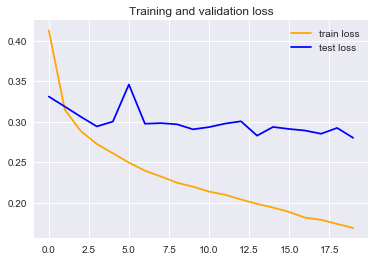

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'orange', label='train loss')
plt.plot(epochs, val_loss, 'blue', label='test loss')
plt.title("Training and validation loss")
plt.legend()

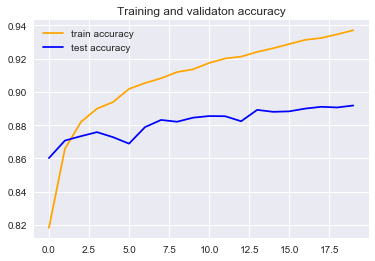

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'orange', label='train accuracy')
plt.plot(epochs, val_acc, 'blue', label='test accuracy')
plt.title("Training and validaton accuracy")
plt.legend()

In [30]:
from keras.utils import plot_model

plot_model(model, to_file='lstm_2_improv.png')

In [31]:
# Predict the class probabilities 
pred_prob = model.predict_proba(X_test)

AUC score is:  0.931526276276


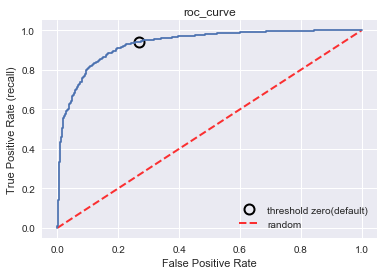

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
# find threshold closest to 0.5:
close_zero = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold zero(default)", fillstyle="none", c='k', mew=2)
plt.plot([0,1], linestyle='--', lw=2, color='r', label='random', alpha=0.8)
plt.legend(loc=4)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (recall)")
plt.title("roc_curve");
from sklearn.metrics import auc
print("AUC score is: ", auc(fpr, tpr));

In [33]:
from sklearn.metrics import confusion_matrix
pred_class = model.predict_classes(X_test)
confusion = confusion_matrix(y_test, pred_class)
classification_accuracy = (confusion[0][0] + confusion[1][1]) / (np.sum(confusion))
print("Test Accuracy: ", classification_accuracy)
print(confusion)

Test Accuracy:  0.896903589022
[[ 433  159]
 [ 134 2116]]


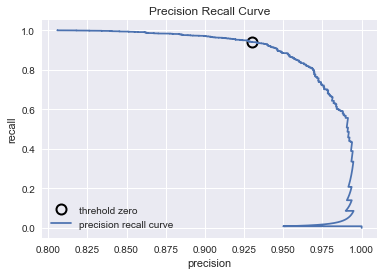

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(\
                                                      y_test, pred_prob)
close_zero = np.argmin(np.abs(thresholds-0.5))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threhold zero", fillstyle="none", c="k", mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.title("Precision Recall Curve")
plt.legend(loc="best");

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_class, 
                            target_names=["negative", "positive"]))

             precision    recall  f1-score   support

   negative       0.76      0.73      0.75       592
   positive       0.93      0.94      0.94      2250

avg / total       0.90      0.90      0.90      2842



In [46]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

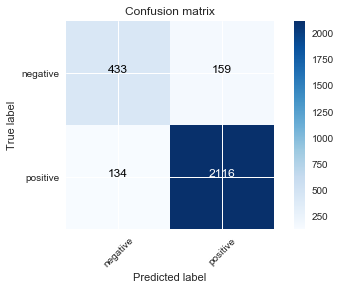

In [47]:
plot_confusion_matrix(confusion, ['negative', 'positive'])

In [48]:
confusion

array([[ 433,  159],
       [ 134, 2116]])

<p>1/